In [1]:
#let's do this.
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.9MB/s 
     |████████████████████████████████| 194kB 23.2MB/s 
     |████████████████████████████████| 1.2MB 21.0MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 12.8MB 303kB/s 
     |████████████████████████████████| 776.8MB 20kB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [7]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/3'),Path('training/4'),Path('training/8'),Path('training/7'),Path('training/9'),Path('training/6'),Path('training/1'),Path('training/2'),Path('training/0')]

In [8]:
fns = {i: [fn for fn in (path/f'training/{i}').ls()] for i in range (10)}
fns[0][:5]

[Path('training/0/57491.png'),
 Path('training/0/8813.png'),
 Path('training/0/59859.png'),
 Path('training/0/40003.png'),
 Path('training/0/8147.png')]

In [9]:
#open images and convert to tensors
img_tensors = {key: [tensor(Image.open(pat)) for pat in paths] for (key, paths) in fns.items()}


In [21]:
img_tensors[6][1][5:25, 10:20]

tensor([[  0,   0,   0,   0,   0,   0,  79, 229, 231,  56],
        [  0,   0,   0,   0,   0,  48, 247, 246,  88,   0],
        [  0,   0,   0,   0,   8, 194, 245,  95,   0,   0],
        [  0,   0,   0,  32, 197, 252,  73,   0,   0,   0],
        [  0,   0,  25, 167, 254, 138,   0,   0,   0,   0],
        [  0,   7, 178, 254, 142,   2,   0,   0,   0,   0],
        [  0,  62, 254, 254,  36,   0,   0,   0,   0,   0],
        [  0, 122, 254, 176,  57,  36,  20,   0,   0,   0],
        [ 40, 247, 254, 254, 254, 254, 238, 152,  40,   0],
        [158, 254, 254, 178, 109, 109, 100, 217, 221,  48],
        [242, 234,  95,   5,   0,   0,   0,  80, 254, 116],
        [254, 125,   0,   0,   0,   0,   0,  11, 254, 164],
        [234,   5,   0,   0,   0,   0,   0,  37, 254, 164],
        [232,   0,   0,   0,   0,   0,   0,  83, 254, 148],
        [234,   5,   0,   0,   0,   0,   5, 160, 254,  66],
        [249, 182,  40,   0,   0,  57, 176, 254, 156,   4],
        [ 86, 229, 251, 187, 186, 253, 2

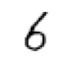

In [16]:
show_image(img_tensors[6][1])

In [23]:
df = pd.DataFrame(img_tensors[6][1][5:25, 8:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,0,0,79,229,231,56,0,0
1,0,0,0,0,0,0,0,48,247,246,88,0,0,0
2,0,0,0,0,0,0,8,194,245,95,0,0,0,0
3,0,0,0,0,0,32,197,252,73,0,0,0,0,0
4,0,0,0,0,25,167,254,138,0,0,0,0,0,0
5,0,0,0,7,178,254,142,2,0,0,0,0,0,0
6,0,0,0,62,254,254,36,0,0,0,0,0,0,0
7,0,0,0,122,254,176,57,36,20,0,0,0,0,0
8,0,0,40,247,254,254,254,254,238,152,40,0,0,0
9,0,0,158,254,254,178,109,109,100,217,221,48,0,0


In [24]:
#stack tensors
stacked_tensors = {key: torch.stack(imgs).float() / 255
                   for (key, imgs) in img_tensors.items()}

In [25]:
for k,v in stacked_tensors.items(): print(f'{k}: {v.shape}')

0: torch.Size([5923, 28, 28])
1: torch.Size([6742, 28, 28])
2: torch.Size([5958, 28, 28])
3: torch.Size([6131, 28, 28])
4: torch.Size([5842, 28, 28])
5: torch.Size([5421, 28, 28])
6: torch.Size([5918, 28, 28])
7: torch.Size([6265, 28, 28])
8: torch.Size([5851, 28, 28])
9: torch.Size([5949, 28, 28])


In [26]:
mean_tensors = {key: imgs.mean(0) for (key, imgs) in stacked_tensors.items()}

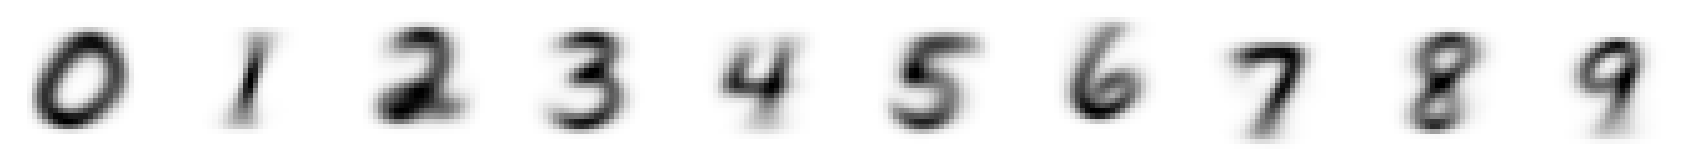

In [27]:
#display class means
show_images(list(mean_tensors.values()))

In [ ]:
#okay that's actually pretty cool..

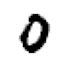

In [28]:
a_0 = stacked_tensors[0][1]
show_image(a_0)

In [30]:
print(' '*5 + 'MAE    RMSE')
for key, mean in mean_tensors.items():
  dist_mae = (a_0 - mean).abs().mean()
  dist_rmse = ((a_0 - mean) ** 2).mean().sqrt()
  print(f'{key}: {dist_mae:.4f},  {dist_rmse:.4f}')

     MAE    RMSE
0: 0.1447,  0.2505
1: 0.1946,  0.3848
2: 0.1663,  0.2891
3: 0.1737,  0.3081
4: 0.1596,  0.3014
5: 0.1697,  0.2997
6: 0.1543,  0.2858
7: 0.1663,  0.3159
8: 0.1660,  0.2999
9: 0.1568,  0.2984


In [31]:
def diff(a, b): return (a - b).abs().mean((-1, -2))

In [32]:
diff(a_0, mean_tensors[0])

tensor(0.1447)

In [33]:
#prep validation set
valid_fns = {i: [fn for fn in (path/f'testing/{i}').ls()] for i in range(10)}
valid_stacked_tensors = {key: torch.stack([tensor(Image.open(pat)) for pat in paths]).float()/255
                         for (key, paths) in valid_fns.items()}

In [35]:
for k,v in valid_stacked_tensors.items(): print(f'{k}: {v.shape}')

0: torch.Size([980, 28, 28])
1: torch.Size([1135, 28, 28])
2: torch.Size([1032, 28, 28])
3: torch.Size([1010, 28, 28])
4: torch.Size([982, 28, 28])
5: torch.Size([892, 28, 28])
6: torch.Size([958, 28, 28])
7: torch.Size([1028, 28, 28])
8: torch.Size([974, 28, 28])
9: torch.Size([1009, 28, 28])


In [36]:
diff_0 = diff(valid_stacked_tensors[0], mean_tensors[0])
diff_1 = diff(valid_stacked_tensors[0], mean_tensors[1])
diff_2 = diff(valid_stacked_tensors[0], mean_tensors[2])

diff_0.shape, diff_1.shape, diff_2.shape

(torch.Size([980]), torch.Size([980]), torch.Size([980]))

In [37]:
diff_combined = torch.stack([diff_0, diff_1, diff_2]).T
diff_combined.shape

torch.Size([980, 3])

In [38]:
diff_combined[0]

tensor([0.1702, 0.1931, 0.2081])

In [40]:
mins = diff_combined.min(1)

In [41]:
(mins.indices == 0).float().mean()

tensor(0.8980)

In [42]:
#let's try to put the above into a function
def cal_accuracy(imgs_dict, means_dict):
  accuracies = []
  for kv, images in imgs_dict.items():
    diffs = []
    for km, mean in means_dict.items():
      diffs.append(diff(images, mean))

    diffs = torch.stack(diffs).T
    mins = diffs.min(1)
    acc = (mins.indices == kv).float().mean()
    accuracies.append(acc)
  return accuracies

In [43]:
accuracies = cal_accuracy(valid_stacked_tensors, mean_tensors)

In [44]:
print('Class Accuracy')
for i, acc in enumerate(accuracies): print(f'{i}    {acc:.4f}')

print(f'Average accuracy: {tensor(accuracies).mean():.4f}')


Class Accuracy
0    0.8153
1    0.9982
2    0.4234
3    0.6089
4    0.6680
5    0.3262
6    0.7871
7    0.7646
8    0.4425
9    0.7760
Average accuracy: 0.6610


In [45]:
# now use SGD
def create_labels(rows, cols, index):
  labels = torch.zeros((rows, cols))
  labels[:, index] = 1
  return labels

In [46]:
#create labels for classes in training set
stacked_labels = {key: create_labels(tensors.shape[0], len(stacked_tensors), key)
for key, tensors in stacked_tensors.items()}
stacked_labels[5][:10]

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [47]:
train_x = torch.cat([o for o in stacked_tensors.values()]).view(-1,28*28)
train_y = torch.cat([o for o in stacked_labels.values()])

train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [48]:
#now validation set
valid_stacked_labels = {key: create_labels(tensors.shape[0], len(valid_stacked_tensors), key)
for key, tensors in valid_stacked_tensors.items()}

valid_x = torch.cat([o for o in valid_stacked_tensors.values()]).view(-1, 28*28)
valid_y = torch.cat([o for o in valid_stacked_labels.values()])

valid_x.shape, valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 10]))

In [49]:
train_dataset = list(zip(train_x, train_y))
train_dl = DataLoader(train_dataset, bs=64, shuffle=True)
a_batch = first(train_dl)
a_batch[0].shape, a_batch[1].shape

(torch.Size([64, 784]), torch.Size([64, 10]))

In [50]:
valid_dataset = list(zip(valid_x, valid_y))
valid_dl = DataLoader(valid_dataset, bs=64)

In [51]:
#loss function

def cross_entropy_loss(preds, targets):
  loss = -(targets * preds.log()).sum() / len(preds)
  return loss


In [52]:
targets = torch.tensor([1, 0, 0])
preds = torch.tensor([0.7, 0.2, 0.1])

cross_entropy_loss(preds, targets)

tensor(0.1189)

In [53]:
# softmax turns prediction to probabilities to sum to 1
def cross_entropy_loss(preds, targets):
  preds = preds.softmax(dim=1)
  loss = -(targets * preds.log()).sum() / len(preds)
  return loss



In [54]:
#define a network
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [55]:
weights = init_params((28*28,10))
bias = init_params(1)

In [56]:
def linear1(xb):
  return xb@weights + bias

In [57]:
#forward pass
images, labels = a_batch
preds = linear1(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(16.7202, grad_fn=<DivBackward0>)

In [58]:
loss.backward()

In [59]:
lr = 1e-3
weights.data -= weights.grad * lr
bias.data -= bias.grad * lr

In [60]:
weights.grad = None
bias.grad = None

In [61]:
preds = linear1(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(16.6969, grad_fn=<DivBackward0>)

In [62]:
def calc_grad(images, labels, model):
  preds = model(images)
  loss = cross_entropy_loss(preds, labels)
  loss.backward()

In [63]:
def train_epoch(model, lr, params):
  for images, labels in train_dl:
    calc_grad(images, labels, model)
    for p in params:
      p.data -= p.grad *lr
      p.grad.zero_()

In [64]:
def cal_accuracy(preds, targets):
  preds = preds.softmax(dim=1)
  preds_i = preds.max(1).indices
  targets_i = targets.max(1).indices
  return (preds_i == targets_i).float().mean()

In [65]:
def validate_epoch(model):
  accs = [cal_accuracy(model(images), labels)
  for images, labels in valid_dl]
  return torch.stack(accs).mean()

In [66]:
validate_epoch(linear1)

tensor(0.0739)

In [68]:
for _ in range(40):
  train_epoch(linear1, lr, (weights, bias))
  print(f'{validate_epoch(linear1):.4f}', end=' ')

0.0941 0.1289 0.1699 0.2142 0.2544 0.2933 0.3244 0.3554 0.3836 0.4089 0.4316 0.4539 0.4762 0.4941 0.5092 0.5244 0.5386 0.5528 0.5655 0.5757 0.5858 0.5958 0.6051 0.6133 0.6219 0.6295 0.6375 0.6446 0.6505 0.6565 0.6629 0.6685 0.6749 0.6808 0.6854 0.6907 0.6953 0.6996 0.7033 0.7064 

In [ ]:
#create optimizer

In [69]:
class Optimizer():
  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr

  def step(self):
    for p in self.params:
      p.data -= p.grad * self.lr

  def zero_grad(self):
    for p in self.params:
      p.grad = None

In [70]:
optim = Optimizer((weights, bias), lr)

In [71]:
def train_epoch(model, optim):
  for images, labels in train_dl:
    calc_grad(images, labels, model)
    optim.step()
    optim.zero_grad()

In [72]:
for _ in range(10):
  train_epoch(linear1, optim)
  print(f'{validate_epoch(linear1):.4f}', end=' ')

0.7097 0.7124 0.7154 0.7188 0.7220 0.7253 0.7298 0.7333 0.7358 0.7375 

In [74]:
def train_model(model, optim, epochs):
  for _ in range(epochs):
    train_epoch(model, optim)
    print(f'{validate_epoch(linear1):.4f}', end=' ')

In [75]:
train_model(linear1, optim, 10)

0.7401 0.7422 0.7446 0.7464 0.7492 0.7502 0.7520 0.7536 0.7559 0.7576 

In [ ]:
#replace optimizer with pytorch sgd

In [76]:
linear = nn.Linear(28*28, 10)
optim = SGD(linear.parameters(), lr)

In [77]:
dls = DataLoaders(train_dl, valid_dl)

In [78]:
learn = Learner(dls, linear, opt_func=SGD,
                loss_func=cross_entropy_loss, metrics=cal_accuracy)

In [79]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,cal_accuracy,time
0,1.612242,1.560185,0.770300,00:02
1,1.229928,1.200488,0.811400,00:02
2,1.038504,1.002159,0.828400,00:02
3,0.910729,0.879397,0.840900,00:02
4,0.830581,0.796035,0.847500,00:02
5,0.753542,0.735853,0.853500,00:02
6,0.717748,0.690115,0.858100,00:02
7,0.683450,0.654029,0.862500,00:02
8,0.659041,0.624670,0.864400,00:02
9,0.628629,0.600265,0.868400,00:02


In [80]:
#add non-linearity
model = nn.Sequential(
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [82]:
learn = Learner(dls, model, opt_func=SGD,
                loss_func=cross_entropy_loss, metrics=cal_accuracy)

In [84]:
learn.fit(20, 1e-2)

epoch,train_loss,valid_loss,cal_accuracy,time
0,0.331701,0.328005,0.907200,00:03
1,0.314212,0.308426,0.913300,00:03
2,0.313837,0.293192,0.918100,00:03
3,0.306746,0.282685,0.920600,00:03
4,0.291000,0.270517,0.923100,00:03
5,0.267491,0.262903,0.925900,00:03
6,0.253750,0.253121,0.929100,00:03
7,0.239117,0.244833,0.930100,00:03
8,0.243737,0.236420,0.932200,00:03
9,0.251245,0.229421,0.935000,00:03


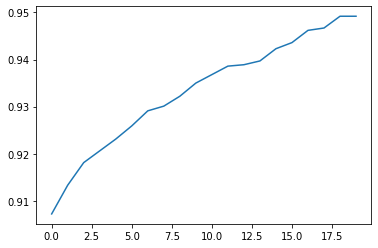

In [85]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [86]:
learn.recorder.values[-1][2]

0.9491999745368958

In [ ]:
#close enough.

In [88]:
#using resnet18
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)

learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.063171,0.033234,0.989700,17:02
